In [1]:
file = open("FEV.csv")

In [2]:
data = []
labels = file.readline().strip().split(",")
for line in file:
    data.append(line.strip().split(","))

In [3]:
labels

['"id"', '"age"', '"fev"', '"height"', '"sex"', '"smoke"']

In [4]:
data[0]

['301', '9', '1.708', '57', '"female"', '"non-current smoker"']

In [5]:
age = [int(row[1]) for row in data]
fev = [float(row[2]) for row in data]
height = [float(row[3]) for row in data]
sex = list(set([row[4] for row in data]))
smoke = list(set([row[5] for row in data]))

All of the data is in thier own sets. Will make it easy to analyze that data later

The sex and smoke categories can be put into unique sets, so theres just the two different entries for both

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# FEV 

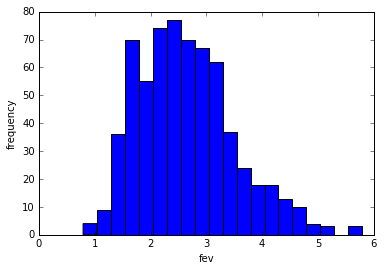

In [7]:
plt.hist(fev, 20)
plt.xlabel("fev")
plt.ylabel("frequency")

The average FEV seems to be bewtween 2 and 3. |

# Age

In [8]:
##http://stackoverflow.com/questions/2161752/how-to-count-the-frequency-of-the-elements-in-a-list##
##This is a dictionary to count the number of each age in the list##
dic = {a: age.count(a) for a in age}
ageList, ageCount = list(dic.keys()), list(dic.values())
print(ageCount)

len(ageCount)

[2, 9, 28, 37, 54, 85, 94, 81, 90, 57, 43, 25, 19, 13, 8, 6, 3]


17

This sets up a list of counts and a list of each age. This will allow me to make a pie chart of ages.

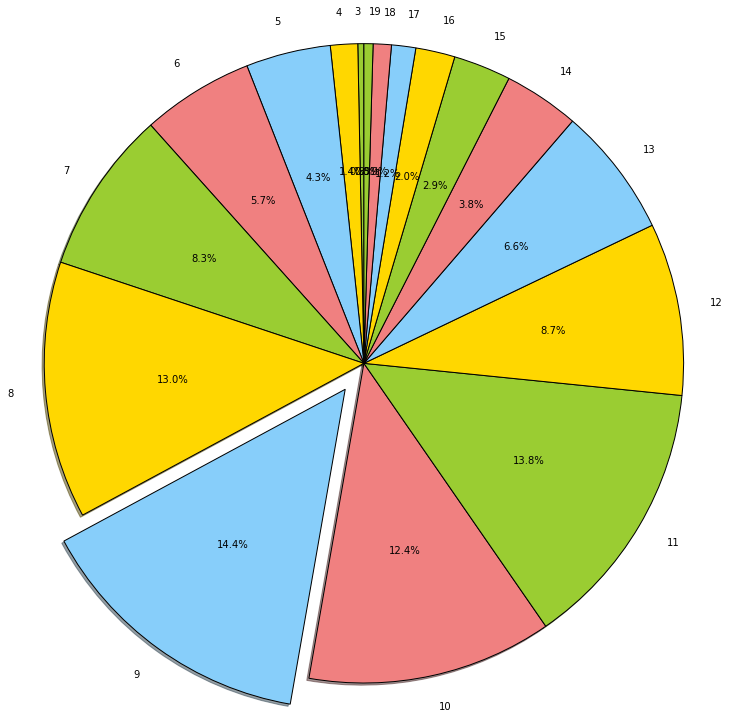

In [9]:
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = [0, 0, 0, 0, 0, 0, 0.3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.pie(ageCount, labels = ageList, colors = colors, autopct='%1.1f%%', shadow=True, startangle=90, radius = 3, explode = explode)
plt.tight_layout()

plt.axes().set_aspect('equal')

This is a quick analysis on the ages. You can see that 9 is the most common age. And the youngest and oldest ages are the least common. 

# Gender

In [13]:
dic = {a: sex.count(a) for a in sex}
sexList, sexCount = list(dic.keys()), list(dic.values())

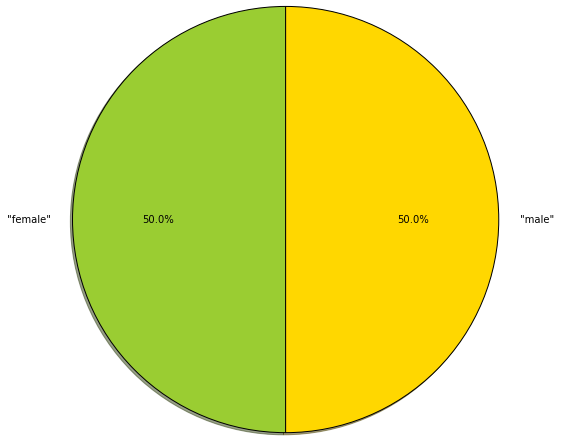

In [16]:
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
plt.pie(sexCount, labels = sexList, colors = colors, autopct='%1.1f%%', shadow=True, startangle=90, radius = 2)
plt.tight_layout()

plt.axes().set_aspect('equal')

# FEV
# Male vs Female

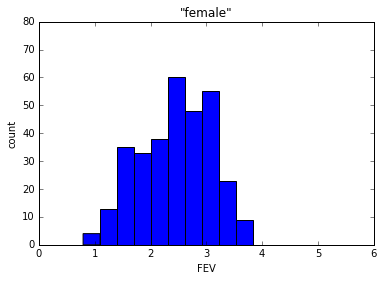

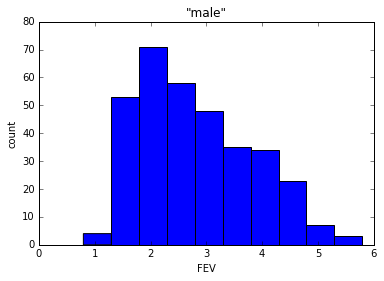

In [17]:
for i in range(len(sex)):
    plt.figure(i+1)
    temp = [float(row[2]) for row in data if row[4] == sex[i]]
    plt.hist(temp)
    plt.title(sex[i])
    plt.xlabel("FEV")
    plt.ylabel("count")
    plt.xlim([0, 6])
    plt.ylim([0, 80])
    

You can see that the female data set seems to have a higher concentration around 3 fev, and the males seems to be more concentrated around the 2 fev score. 

This may show that females will have a higher fev than males. However, females seem to plateau around 4. So men can still reach a higher fev value.

# FEV 
# Smoker vs Non-Smoker

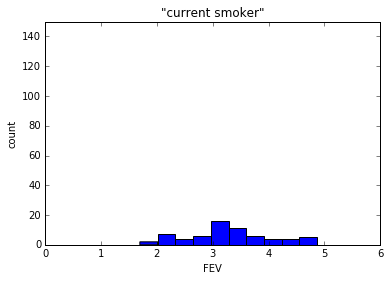

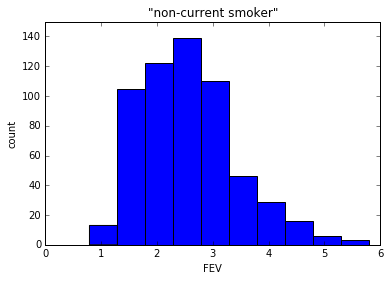

In [18]:
for i in range(len(smoke)):
    plt.figure(i+1)
    temp = [float(row[2]) for row in data if row[5] == smoke[i]]
    plt.hist(temp)
    plt.title(smoke[i])
    plt.xlabel("FEV")
    plt.ylabel("count")
    plt.xlim([0, 6])
    plt.ylim([0, 150])

This comparison is really interesting because it makes it look like current smokers have a higher average fev than the non-smokers do. Which is much different than I would have thought. 

I do have an idea as to why this is happening. The current smokers will be generally older than the non-smokers. I will compare this below to see if this ends up holding true.

# FEV & Age

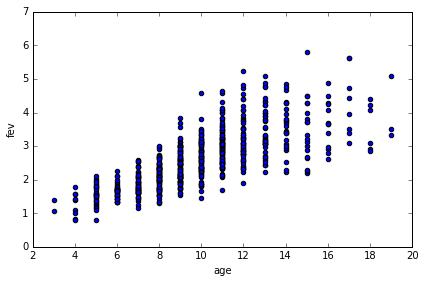

In [19]:
plt.scatter(age, fev)
plt.xlabel("age")
plt.ylabel("fev")
plt.tight_layout()

As you can see, as the age increases so too does the fev.

In [20]:
import scipy.stats as st
slope, intercept, r_value, p_value, std_error = st.linregress(age, fev)

In [21]:
import numpy as np
interps = np.linspace(0, 20, 20)

r-value = 0.75645898999


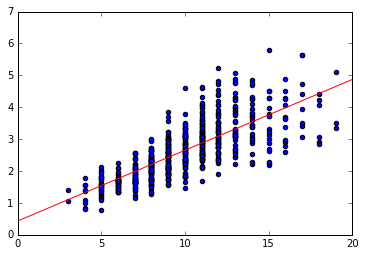

In [22]:
plt.scatter(age, fev)
plt.plot(interps, intercept + slope * interps, color = 'r')
plt.xlim([0,20])
print("r-value = "+ str(r_value))

Because the r value is so close to one, the correlation between the increase in age and the increase in fev is correct.

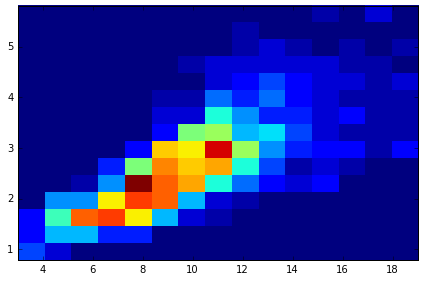

In [23]:
plt.hist2d(age, fev, 15)
plt.tight_layout()

This was another cool graph that I wanted to try out. Shows the same thing as the scatter but in a heat map. 

# FEV & Age 
## Male vs. Female

"female"=318
"male"=336


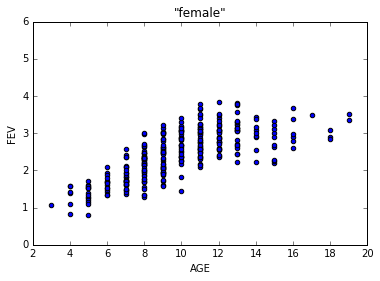

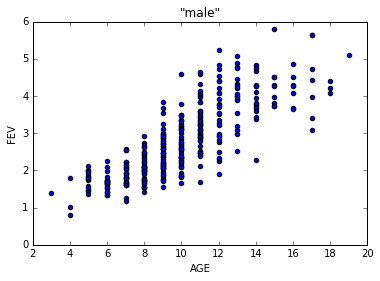

In [24]:
for i in range(len(sex)):
    plt.figure(i+1)
    tempFev = [float(row[2]) for row in data if row[4] == sex[i]]
    tempAge = [int(row[1]) for row in data if row[4] == sex[i]]

    plt.scatter(tempAge, tempFev)
    plt.title(sex[i])
    plt.xlabel("AGE")
    plt.ylabel("FEV")
    plt.ylim([0, 6])
    print(sex[i] + '=' + str(len(tempAge)))
    
    ##need to add in a linear reg line to show the correlation

Just as we observed above, females seem to taper off around 4, but males continue to get higher fev values. This also shows that both males and females fev increase as they grow older. 

# FEV & Age 
## Smoker vs. Non-Smoker

In [25]:
import numpy as np
interps = np.linspace(0, 20, 20)

"current smoker" count =65
"current smoker" r-val = 0.249075155526
"non-current smoker" count =589
"non-current smoker" r-val = 0.781597718652


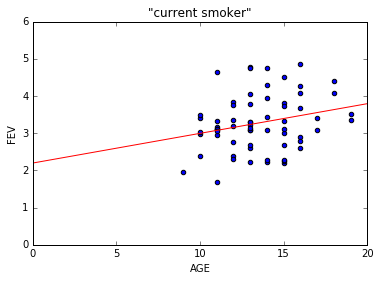

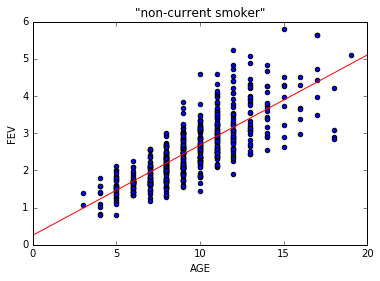

In [26]:
for i in range(len(smoke)):
    plt.figure(i+1)
    tempFev = [float(row[2]) for row in data if row[5] == smoke[i]]
    tempAge = [int(row[1]) for row in data if row[5] == smoke[i]]
    
    slope, intercept, r_value, p_value, std_error = st.linregress(tempAge, tempFev)

    plt.scatter(tempAge, tempFev)
    plt.plot(interps, intercept + slope * interps, color = 'r')
    
    plt.title(smoke[i])
    plt.xlabel("AGE")
    plt.ylabel("FEV")
    plt.ylim([0, 6])
    plt.xlim([0, 20])
    print(smoke[i] + ' count =' + str(len(tempAge)))
    print(smoke[i] + ' r-val = ' + str(r_value))

As you can see from these two graphs, and their linear regression lines, that the r value of the current smokers is close to 0. Meaning that there is no correlation between the data points. The r_value for the non-smoker is close to positive one meaning there is a postive slope and a strong correlation.

The smokers seem to top out around 5 fev. Although most of the non current smokers also top out around there too. 

The smoker data is very inconsistent

# FEV & Height

r value = 0.868135009065


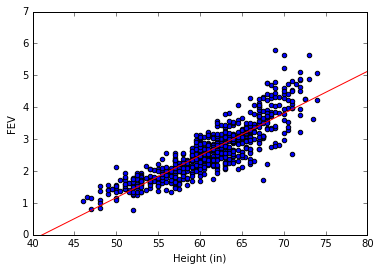

In [27]:
plt.scatter(height, fev)
plt.xlabel("Height (in)")
plt.ylabel("FEV")
plt.xlim([40, 80])
plt.ylim([0, 7])

interps = np.linspace(0, 100, 100)
slope, intercept, r_value, p_value, std_error = st.linregress(height, fev)
plt.plot(interps, intercept + slope * interps, color = 'r')
print("r value = " + str(r_value))

You can see the r value for this is extremely high. This means the correlation between height and FEV is strong. So the taller the person is the higher (on average) their FEV will be. 

# FEV & Height
## Male vs Female

"female" count =318
"female" r-val = 0.83428469699
"female" slope = 0.11242599999
"male" count =336
"male" r-val = 0.882383256447
"male" slope = 0.139883160555


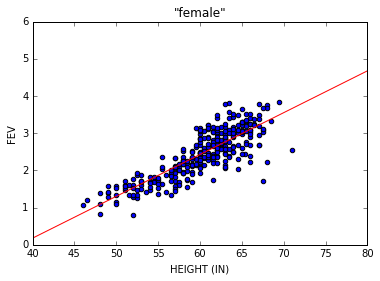

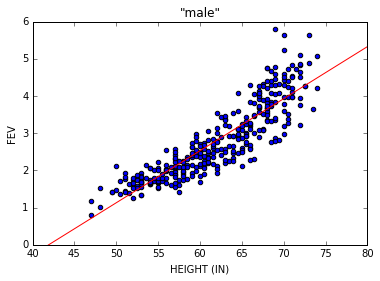

In [28]:
for i in range(len(sex)):
    plt.figure(i+1)
    tempFev = [float(row[2]) for row in data if row[4] == sex[i]]
    tempHeight = [float(row[3]) for row in data if row[4] == sex[i]]
    
    slope, intercept, r_value, p_value, std_error = st.linregress(tempHeight, tempFev)

    plt.scatter(tempHeight, tempFev)
    plt.plot(interps, intercept + slope * interps, color = 'r')
    
    plt.title(sex[i])
    plt.xlabel("HEIGHT (IN)")
    plt.ylabel("FEV")
    plt.ylim([0, 6])
    plt.xlim([40, 80])
    print(sex[i] + ' count =' + str(len(tempHeight)))
    print(sex[i] + ' r-val = ' + str(r_value))
    print(sex[i] + ' slope = ' + str(slope))

For both male and female there is a strong correlation between height and fev. This is pretty interesting that it doesn't matter for either gender. 

# FEV & Height
## Smoker vs Non-Smoker

"current smoker" count =65
"current smoker" r-val = 0.689241389772
"non-current smoker" count =589
"non-current smoker" r-val = 0.872667030392


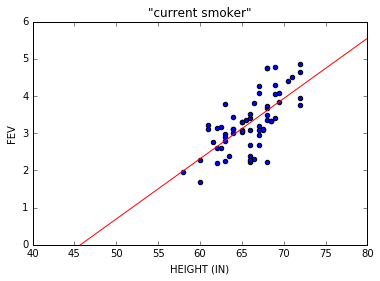

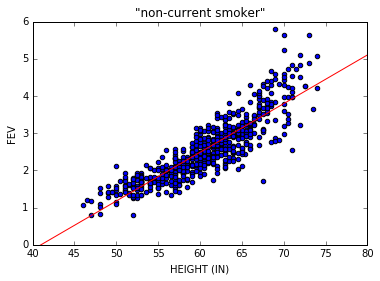

In [29]:
for i in range(len(smoke)):
    plt.figure(i+1)
    tempFev = [float(row[2]) for row in data if row[5] == smoke[i]]
    tempHeight = [float(row[3]) for row in data if row[5] == smoke[i]]
    
    slope, intercept, r_value, p_value, std_error = st.linregress(tempHeight, tempFev)

    plt.scatter(tempHeight, tempFev)
    plt.plot(interps, intercept + slope * interps, color = 'r')
    
    plt.title(smoke[i])
    plt.xlabel("HEIGHT (IN)")
    plt.ylabel("FEV")
    plt.ylim([0, 6])
    plt.xlim([40, 80])
    print(smoke[i] + ' count =' + str(len(tempHeight)))
    print(smoke[i] + ' r-val = ' + str(r_value))

From all of these different graphs, we can tell that height plays a major factor in the FEV value. 

So the tall you are, you would have larger lungs meaning that you could expel more air in a second.

# FEV vs Height vs Age

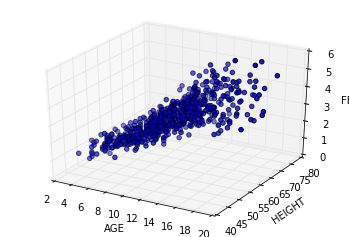

In [30]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(age, height, fev)
ax.set_zlim([0, 6])

ax.set_xlabel("AGE")
ax.set_ylabel("HEIGHT")
ax.set_zlabel("FEV")


This was just a fun graph that I wanted to do, but it also shows the correlation between height age and FEV. As height increases, and the age increases so too does the FEV.

# Conclusion

You can conclude from this data that the taller you are, the older you are, if you are a male and if you are a non-smoker, you will have a higher FEV than someone who isn't one of those things.

During this lab I compared every combo of possiblilities. So I feel very confident that if you are a tall older male that you will have a high FEV. And a short, young female you will generally have a lower FEV.